# Lab 3

By Niksh Hiremath (U20240158)


## 1. Code


### Importing libraries


In [19]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

### Reading image


In [20]:
IMAGE_PATH = "sat_image_plaksha.jpg"

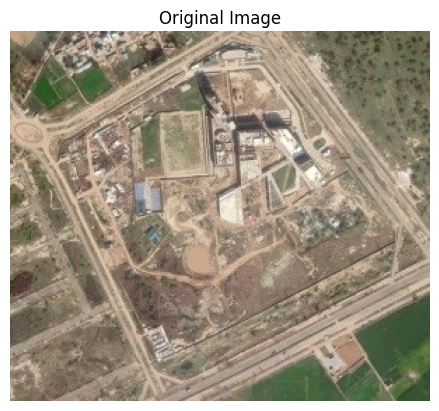

In [21]:
# Reading as RGB image directly (not BGR image).
img = cv2.imread(IMAGE_PATH, cv2.IMREAD_COLOR_RGB)

plt.imshow(img)
plt.title("Original Image")
plt.axis("off")
plt.show()

### Converting image to grayscale


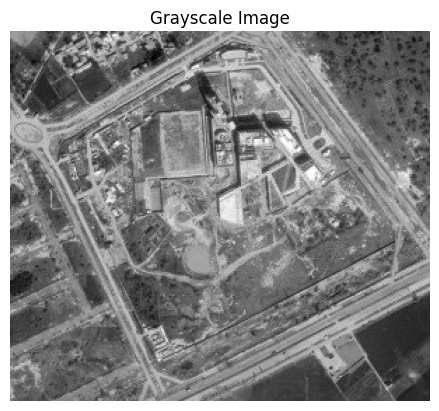

In [22]:
# Converts RGB image to Grayscale color space.
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

plt.imshow(gray_img, cmap="gray")
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

### Converting image to double precision


In [23]:
double_img = gray_img.astype(np.float64)

### Computing the mean of each column (pixels) and subtract it from the image


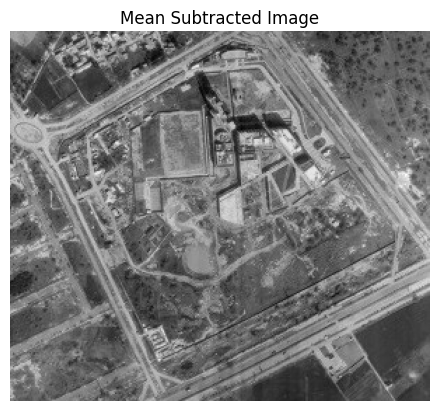

In [24]:
M = np.mean(double_img, axis=0)
mean_subtracted_img = double_img - M

plt.imshow(mean_subtracted_img, cmap="gray")
plt.title("Mean Subtracted Image")
plt.axis("off")
plt.show()

### Computing the covariance matrix


In [25]:
cov_matrix = np.cov(mean_subtracted_img, rowvar=False)

cov_matrix

array([[1518.87589296, 1343.12579214, 1121.83208031, ..., -167.01493548,
        -126.55036583, -139.92042574],
       [1343.12579214, 1545.76489227, 1265.9413815 , ..., -140.70183777,
         -89.85392902,  -73.36280101],
       [1121.83208031, 1265.9413815 , 1425.59659811, ..., -144.06704401,
         -86.40752103,  -38.05082671],
       ...,
       [-167.01493548, -140.70183777, -144.06704401, ..., 1254.67990264,
        1140.29068729, 1075.81819622],
       [-126.55036583,  -89.85392902,  -86.40752103, ..., 1140.29068729,
        1184.58519127, 1148.42033932],
       [-139.92042574,  -73.36280101,  -38.05082671, ..., 1075.81819622,
        1148.42033932, 1233.26545397]], shape=(300, 300))

### Calculating eigenvalues and eigenvectors


In [26]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

print(f"Number of eigenvalues: {len(eigenvalues)}")

Number of eigenvalues: 300


### Sorting eigenvectors based on eigenvalues


In [27]:
sorted_indices = np.argsort(eigenvalues)

sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

### Number of principal components to keep


In [28]:
num_components = [10, 20, 30, 40, 50, 60, 91, 300]

### Reconstructing image


In [29]:
output_images = []

In [30]:
for n in num_components:
    selected_components = sorted_eigenvectors[:, -n:]
    P = np.dot(selected_components.T, mean_subtracted_img.T).T
    reconstructed_data = np.dot(selected_components, P.T).T + M
    reconstructed_img = np.astype(reconstructed_data, np.float64)
    output_images.append(reconstructed_img)

c:\Users\niksh\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\_core\numeric.py:2681: ComplexWarning: Casting complex values to real discards the imaginary part
  return x.astype(dtype, copy=copy)


### Displaying results


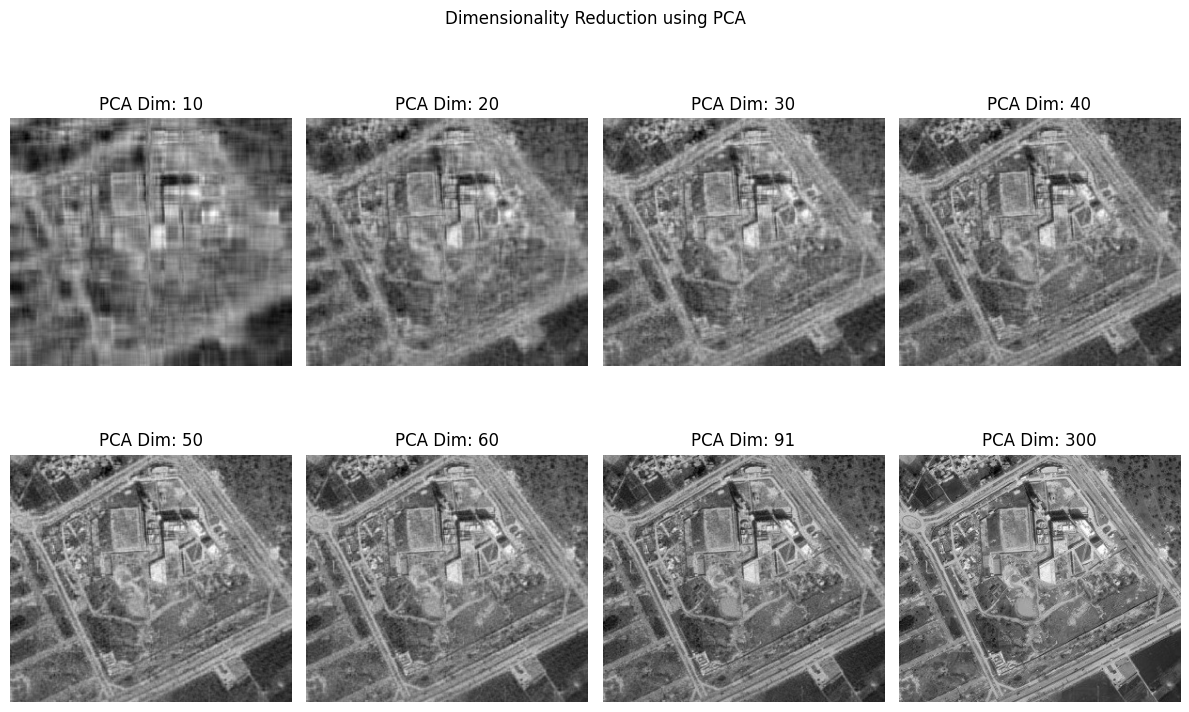

In [31]:
fig = plt.figure(figsize=(12, 8))
fig.suptitle("Dimensionality Reduction using PCA")

ncols = 4
nrows = len(num_components) // ncols + (len(num_components) % ncols > 0)

for i, (n, pca_img) in enumerate(zip(num_components, output_images), start=1):
    ax = fig.add_subplot(nrows, ncols, i)
    ax.imshow(pca_img, cmap="gray")
    ax.set_title(f"PCA Dim: {n}")
    ax.axis("off")

plt.tight_layout()
plt.show()

### Using PCA to see how 91 dimensions explain 95% variance


In [32]:
from sklearn.decomposition import PCA

In [33]:
pca = PCA(n_components=91)

pca.fit(mean_subtracted_img)

,n_components,91
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [34]:
print("Explained variance ratio for each component:")
print(pca.explained_variance_ratio_)

Explained variance ratio for each component:
[0.1542179  0.10029607 0.0804895  0.06255465 0.04750301 0.04389041
 0.03606547 0.02890827 0.02516134 0.02385015 0.01845784 0.0182867
 0.01463911 0.01304431 0.0122852  0.01154048 0.01110872 0.01046085
 0.01026551 0.0095376  0.00890394 0.00802627 0.00781024 0.00744211
 0.00714498 0.0067774  0.0065078  0.00648318 0.00603782 0.00576016
 0.0054886  0.00526606 0.00507705 0.00479882 0.00466495 0.00458413
 0.00415585 0.00409376 0.00405989 0.0038057  0.0037135  0.00352332
 0.00340345 0.00331784 0.00328249 0.00315748 0.0030676  0.00298603
 0.00296231 0.00280566 0.00268809 0.00259306 0.00255592 0.00245078
 0.00237348 0.00233902 0.00222085 0.00218182 0.00212673 0.00209099
 0.00202107 0.00200392 0.00194006 0.0018674  0.00185261 0.00179427
 0.00175566 0.00170687 0.00167395 0.00163995 0.00161762 0.00158429
 0.0015581  0.00149156 0.00146473 0.00145236 0.00140681 0.00139146
 0.00131936 0.00128859 0.00124891 0.00123382 0.00121674 0.00120074
 0.00115924 0.0011

In [35]:
print(
    f"Explained variance ratio for 91 components: {np.sum(pca.explained_variance_ratio_) * 100:.2f}%"
)

Explained variance ratio for 91 components: 95.06%


## 2. Report


### Consolidated Graphs


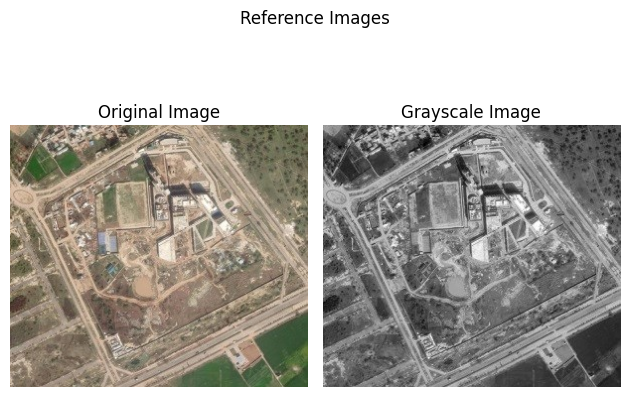

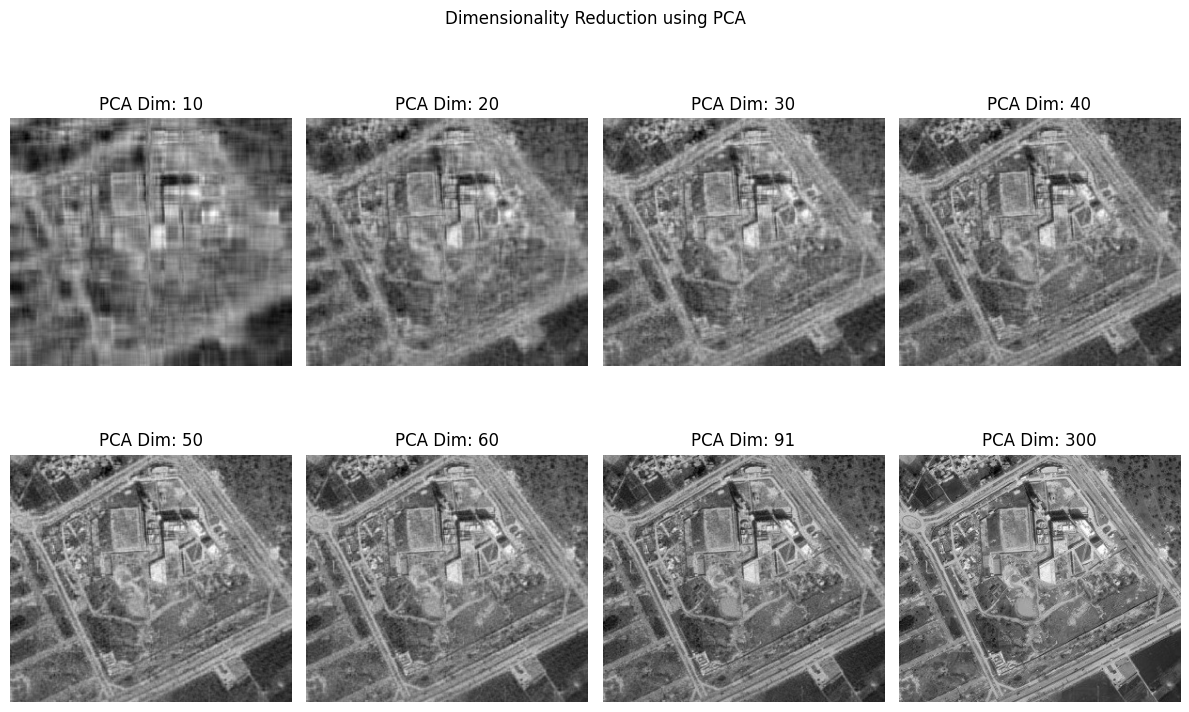

In [36]:
fig = plt.figure()
fig.suptitle("Reference Images")

ax = fig.add_subplot(1, 2, 1)
ax.imshow(img)
ax.set_title("Original Image")
ax.axis("off")

ax = fig.add_subplot(1, 2, 2)
ax.imshow(gray_img, cmap="gray")
ax.set_title("Grayscale Image")
ax.axis("off")

plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(12, 8))
fig.suptitle("Dimensionality Reduction using PCA")

ncols = 4
nrows = len(num_components) // ncols + (len(num_components) % ncols > 0)

for i, (n, pca_img) in enumerate(zip(num_components, output_images), start=1):
    ax = fig.add_subplot(nrows, ncols, i)
    ax.imshow(pca_img, cmap="gray")
    ax.set_title(f"PCA Dim: {n}")
    ax.axis("off")

plt.tight_layout()
plt.show()

---
### Q1: What is the difference between PCA and Feature Selection?

**Ans:** PCA is used for dimensionality reduction. It projects the data onto a lower dimensional space which captures the most variance in the data.

Whereas, feature selection is just a selection method. It selects the best subset of features from the original feature set based on some criteria. 

---


### Q2: Why do we standardize features before applying PCA?

**Ans:** PCA is impacted by the scale of the feature. Because without standardization, features with larger values will dominate the principal components. Standardizing features ensures that each feature is given equal importance when computing the principal components.

---


### Q3: What is the importance of Covariance Matrix in PCA?

**Ans:** The covariance matrix captures the relationship between different features in the dataset. It is used to identify the principal components which capture the most variance in the data. The eigenvectors of the covariance matrix represent the directions of maximum variance, while the eigenvalues indicate the amount of variance captured by each principal component.

---


### Q4: What are some limitations of PCA?

**Ans:** Limitations of PCA:

- It only works on linear relationships.

- It is sensitive to outliers.

- It can be difficult to understand the principal components.

---


### Q5: How can we figure out the importance of individual PCs in PCA?

**Ans:** We can figure out the importance of individual PCs in PCA by looking at the explained variance ratio. It is the ratio of variance explained by each component to the total variance in the data. The higher the value, the more important the component is.

---


## References


1. https://machinelearningmastery.com/calculate-principal-component-analysis-scratch-python/

2. https://numpy.org/doc/stable/reference/generated/numpy.cov.html

3. https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html

4. https://numpy.org/doc/stable/reference/generated/numpy.argsort.html

5. https://numpy.org/doc/stable/reference/generated/numpy.dot.html
